In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import umap
import pandas as pd
import numpy as np

import prismo

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from plotnine import *

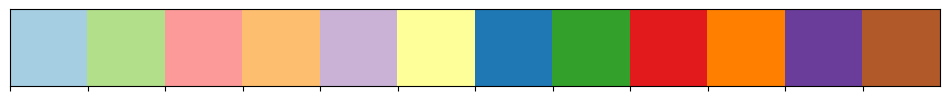

In [4]:
# # Discrete colors
# colors_disc = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33', '#A65628', '#F781BF', '#999999']

# # Continuous colors
# colors_div = ["#214D83", "#7D1B26"]  # blue, red


import matplotlib as mpl
from functools import partial
import numpy as np
from mizani.palettes import brewer_pal


mpl.rcParams["svg.fonttype"] = "none"
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.labelsize"] = 7
mpl.rcParams["axes.titlesize"] = 7
mpl.rcParams["xtick.labelsize"] = 7
mpl.rcParams["ytick.labelsize"] = 7
mpl.rcParams["legend.fontsize"] = 7
mpl.rcParams["figure.titlesize"] = 7

p9.options.base_family = "Helvetica"
th = theme_bw(base_size=7, base_family="Helvetica") + theme(
    line=element_line(size=0.5),
    rect=element_rect(size=0.5),
    panel_grid_minor=element_blank(),
    panel_border=element_line(),
    axis_ticks=element_line(color="black"),
    axis_ticks_minor=element_blank(),
    axis_text=element_text(color="black", size=7),
    strip_background=element_blank(),
    strip_text=element_text(color="black", size=7),
    legend_text=element_text(size=7),
    legend_key=element_blank(),
    plot_title=element_text(ha="center"),
    # aspect_ratio=1,
)
theme_set(th)


def _rescale_zerosymmetric(x, to: tuple[float, float] = (0, 1), _from: tuple[float, float] | None = None):
    _from = _from or (np.min(x), np.max(x))
    return np.interp(x, (_from[0], 0, _from[1]), (0, 0.5, 1))

_scale_fill_zerosymmetric_diverging = partial(
    scale_fill_gradientn,
    colors=brewer_pal(type="div", palette="RdBu", direction=-1)(11),
    rescaler=_rescale_zerosymmetric,
    expand=(0, 0),
)

_weights_inferred_color_scale = scale_color_manual(
    values=("red", "black"), breaks=(True, False), labels=("Inferred", "Annotated")
)

DISCRETE_COLORS = [
    "#a6cee3",
    "#b2df8a",
    "#fb9a99",
    "#fdbf6f",
    "#cab2d6",
    "#ffff99",
    "#1f78b4",
    "#33a02c",
    "#e31a1c",
    "#ff7f00",
    "#6a3d9a",
    "#b15928",
]

discrete_scale_fill = scale_fill_manual(values=DISCRETE_COLORS)
discrete_scale_color = scale_color_manual(values=DISCRETE_COLORS)

sns.palplot(DISCRETE_COLORS)

In [5]:
device = "cpu"
try:
    device = f"cuda:{prismo.tl.get_free_gpu_idx()}"
except Exception as e:
    print(e)
device

'cuda:0'

In [6]:
device

'cuda:0'

In [7]:
model = prismo.PRISMO.load("model_20241229_185136.h5", map_location=device)

The stored model was created with a different version of PRISMO. Some features may not work.


In [8]:
model._train_opts

TrainingOptions(device=device(type='cuda', index=0), batch_size=10000, max_epochs=200, n_particles=1, lr=0.003, early_stopper_patience=10, print_every=100, save_path='model_20241229_185136.h5', mofa_compat=False, seed=np.int64(2412291723))

In [9]:
model._data_opts

DataOptions(group_by=None, scale_per_group=True, covariates_obs_key=None, covariates_obsm_key={'group_xenium': 'spatial'}, use_obs='union', use_var='union', plot_data_overview=False)

In [11]:
model._gp_opts

SmoothOptions(n_inducing=400, kernel='RBF', warp_groups=[], warp_interval=20, warp_open_begin=True, warp_open_end=True, warp_reference_group=None)

In [12]:
model._model_opts

ModelOptions(n_factors=36, weight_prior={'rna': 'Horseshoe'}, factor_prior={'group_chromium': 'Normal', 'group_xenium': 'GP'}, likelihoods={'rna': 'Normal'}, nonnegative_weights={'rna': np.True_}, nonnegative_factors={'group_chromium': np.True_, 'group_xenium': np.True_}, annotations=None, annotations_varm_key={'rna': 'gene_set_mask'}, prior_penalty=0.003, init_factors=np.float64(0.0), init_scale=0.1)

In [9]:
import torch
print(torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(f"CUDA device {i}: {torch.cuda.get_device_name(i)}")

2
CUDA device 0: NVIDIA GeForce RTX 4090
CUDA device 1: NVIDIA GeForce RTX 4090


In [7]:
model._train_opts.seed

np.int64(2412291723)

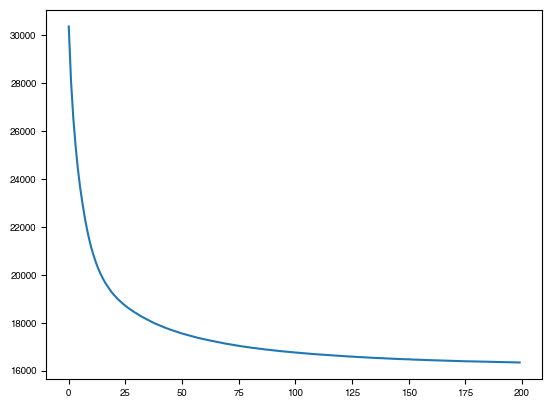

In [8]:
plt.plot(model._train_loss_elbo)
plt.show()

In [9]:
old_factor_names = model._factor_names.copy()
old_factor_names

array(['Factor 1', 'Factor 2', 'Factor 3', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_ANDROGEN_RESPONSE',
       'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APOPTOSIS',
       'HALLMARK_COAGULATION', 'HALLMARK_COMPLEMENT',
       'HALLMARK_DNA_REPAIR', 'HALLMARK_E2F_TARGETS',
       'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY',
       'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_G2M_CHECKPOINT',
       'HALLMARK_GLYCOLYSIS', 'HALLMARK_HEME_METABOLISM',
       'HALLMARK_HYPOXIA', 'HALLMARK_IL2_STAT5_SIGNALING',
       'HALLMARK_INFLAMMATORY_RESPONSE',
       'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_KRAS_SIGNALING_UP',
       'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYOGENESIS',
       'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_P53_PATHWAY',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_PROTEIN_SECR

In [10]:
new_factor_names = pd.Series(old_factor_names).str.split("_").str[1:].str.join(" ").str.title() + " (" + pd.Series(old_factor_names).str.split("_").str[0].str[0] + ")"
new_factor_names.iloc[:3] = [f"Factor {k}" for k in range(1, 4)]
model._factor_names = new_factor_names
model.factor_names

0                                  Factor 1
1                                  Factor 2
2                                  Factor 3
3                          Adipogenesis (H)
4                   Allograft Rejection (H)
5                     Androgen Response (H)
6                       Apical Junction (H)
7                             Apoptosis (H)
8                           Coagulation (H)
9                            Complement (H)
10                           Dna Repair (H)
11                          E2F Targets (H)
12    Epithelial Mesenchymal Transition (H)
13              Estrogen Response Early (H)
14               Estrogen Response Late (H)
15                       G2M Checkpoint (H)
16                           Glycolysis (H)
17                      Heme Metabolism (H)
18                              Hypoxia (H)
19                  Il2 Stat5 Signaling (H)
20                Inflammatory Response (H)
21            Interferon Alpha Response (H)
22            Interferon Gamma R

In [11]:
model._df_r2_full

group_xenium  group_chromium
rna      0.649873         0.41914

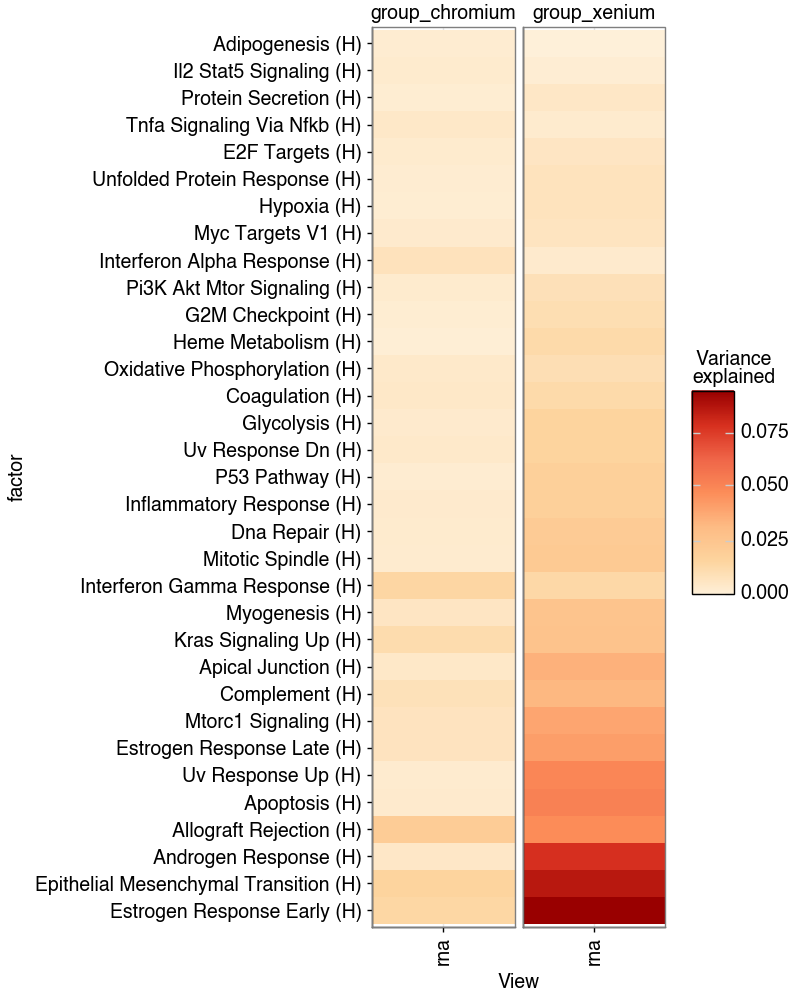

In [58]:
prismo.pl.plot_variance_explained(model, figsize=(4, 5), ordered=True, top_n=None, include_uninformed=False)

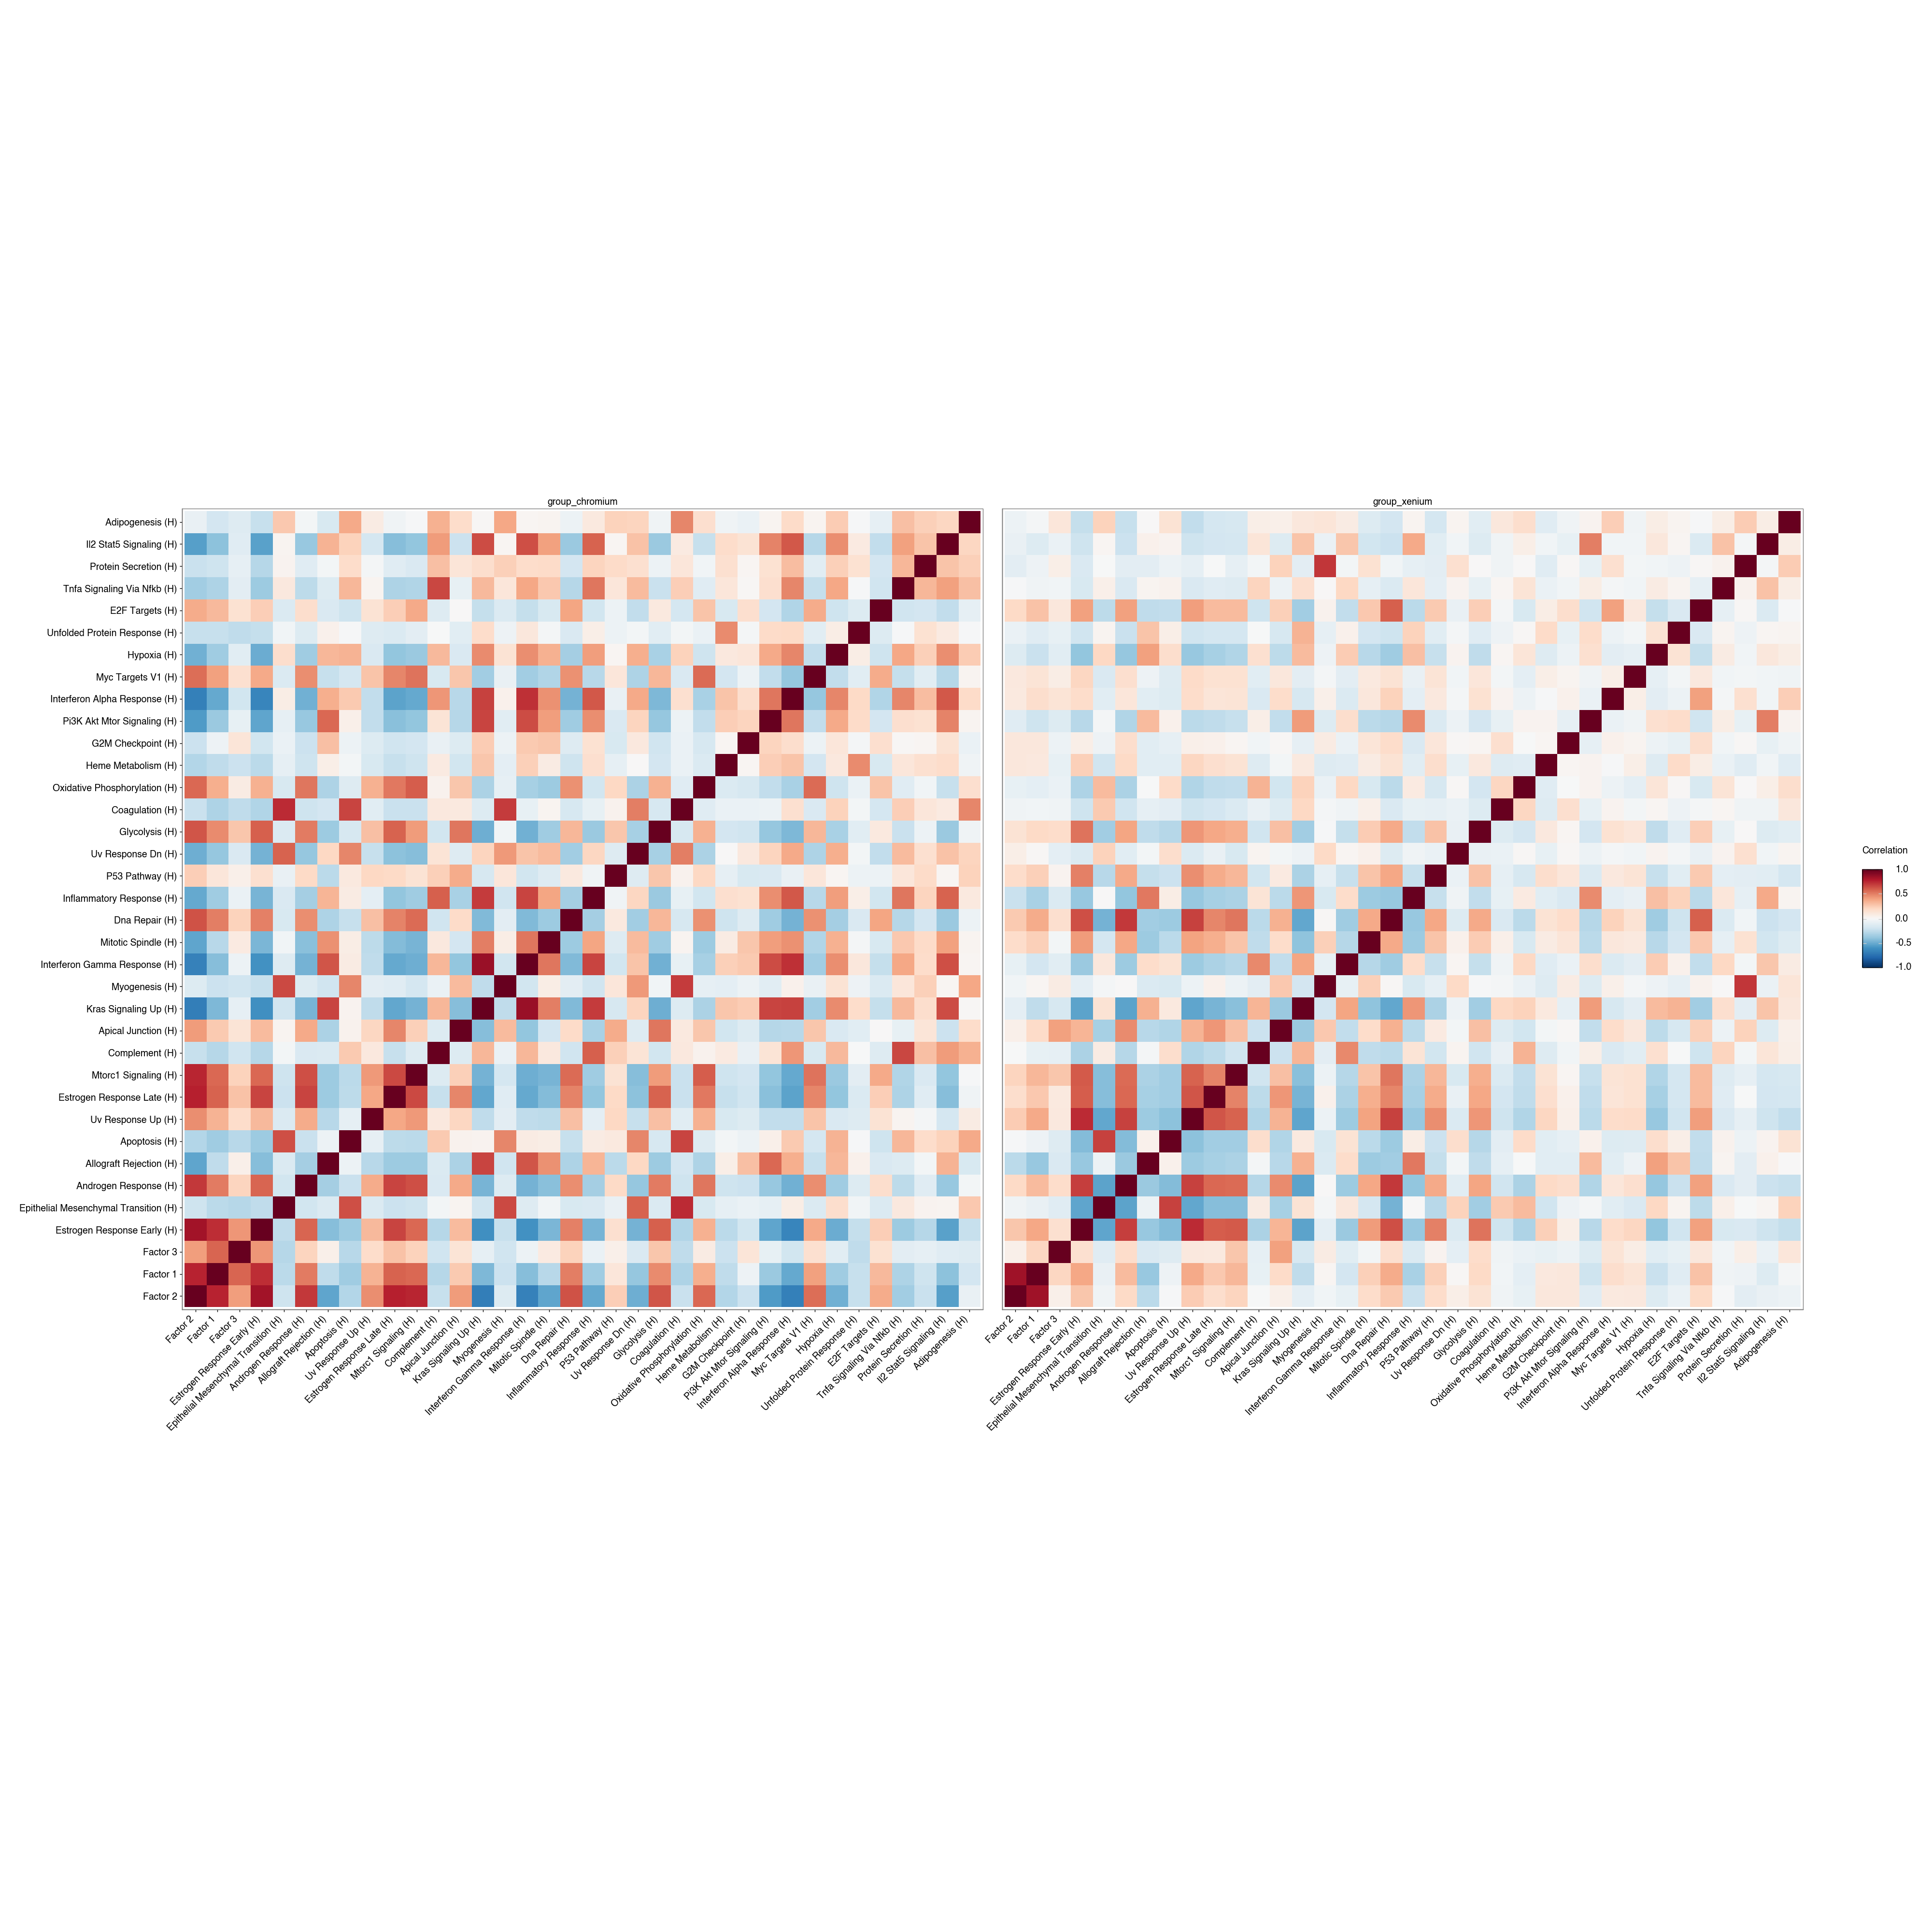

In [13]:
prismo.pl.plot_factor_correlation(model, figsize=(20, 20), ordered=True)

In [14]:
def filter_factors(model, group_idx, r2_thresh = 0.99):

    r2_df = model._df_r2_factors[group_idx].copy()

    r2_sorted = r2_df.sum(1).sort_values(ascending=False)

    factor_subset = r2_sorted.index
    if r2_thresh < 1.0:
        r2_thresh = (r2_sorted.cumsum() / r2_sorted.sum() < r2_thresh).sum() + 1

    factor_subset = r2_sorted.iloc[: int(r2_thresh)].index

    return model.factor_names[factor_subset].tolist()

In [15]:
group_idx = "group_xenium"

In [16]:
relevant_factors = filter_factors(model, group_idx)
len(relevant_factors)

31

In [17]:
factor_adata = model.get_factors("anndata")[group_idx][:, relevant_factors].copy()
factor_adata

AnnData object with n_obs × n_vars = 166283 × 31
    obs: 'celltype', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'

In [18]:
# celltype_map = {k: "" for k in model._cache["factors"]["group_xenium"].obs["celltype"].unique().tolist()}
celltype_map = {
    "DCIS_2": "DCIS#2",
    "Macrophages_1": "Macrophages",
    "Invasive_Tumor": "Invasive Tumor",
    "Stromal": "Stromal",
    "CD4+_T_Cells": "T Cells",
    "Unlabeled": "UNL",
    "CD8+_T_Cells": "T Cells",
    "Prolif_Invasive_Tumor": "Invasive Tumor",
    "Endothelial": "Endothelial",
    "Macrophages_2": "Macrophages",
    "T_Cell_&_Tumor_Hybrid": "T Cells & Tumor",
    "Myoepi_ACTA2+": "Myoepithelial",
    "B_Cells": "B Cells",
    "LAMP3+_DCs": "Dendritic Cells",
    "DCIS_1": "DCIS#1",
    "Perivascular-Like": "Perivascular",
    "Stromal_&_T_Cell_Hybrid": "Stromal & T Cells",
    "Myoepi_KRT15+": "Myoepithelial",
    "IRF7+_DCs": "Dendritic Cells",
    "Mast_Cells": "Mast Cells",
}

factor_adata.obs["celltype (high)"] = (
    factor_adata
    .obs["celltype"]
    .map(celltype_map)
    .astype("category")
)

In [19]:
# def umap_fit_transform(adata, n_neighbors=15, min_dist=0.2, n_components=2, metric="euclidean"):
#     transformer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric)
#     adata.obsm["X_umap"] = pd.DataFrame(transformer.fit_transform(adata.to_df()), index=adata.obs_names, columns=["UMAP1", "UMAP2"])
#     return adata

In [20]:
# umap_fit_transform(factor_adata)

/home/aqoku/miniforge3/envs/prismo_exp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


AnnData object with n_obs × n_vars = 166283 × 31
    obs: 'celltype', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'celltype (high)'
    obsm: 'X_umap'

In [21]:
# pd.Series(umap_data.loc[umap_data["UMAP1"] < 0, :].index).to_csv("remove_idx.csv")

In [22]:
# umap_data = pd.concat([factor_adata.obs["celltype (high)"], pd.DataFrame(factor_adata.obsm["X_umap"], index=factor_adata.obs_names, columns=["UMAP1", "UMAP2"])], axis=1)
# umap_data = umap_data.loc[np.random.choice(umap_data.index, size=umap_data.shape[0], replace=False), :].copy()

# p = (
#     ggplot(umap_data, aes(x='UMAP1', y='UMAP2', fill='celltype (high)')) +
#     geom_point(size=1, stroke=0, alpha=1.0) +
#     # labs(title="TEST") +
#     # scale_fill_manual(values=(colors_disc[1], colors_disc[4])) +
#     theme_light()
# )

# p.show()

# # sc.pl.umap(factor_adata, color="batch", size=8)

In [23]:
def _subset_df(data, groupby, groups, include_rest=True):
    if groups is None:
        return data

    _groups = groups.copy()

    if include_rest:
        data[groupby] = data[groupby].cat.add_categories(include_rest)
        data.loc[~data[groupby].isin(_groups), groupby] = include_rest
        _groups.append(include_rest)
    data = data.loc[data[groupby].isin(_groups), :].copy()
    data[groupby] = data[groupby].cat.remove_unused_categories()

    if data.empty:
        raise ValueError("Empty data, check whether the provided `groups` are correct.")

    return data

def get_top_factors_per_group(adata, groupby, groups=None, top=1, scores_key="scores", include_rest=True, **kwargs):
    sc.tl.rank_genes_groups(adata, groupby)
    group_df = sc.get.rank_genes_groups_df(adata, group=groups)
    group_df["scores_abs"] = group_df["scores"].abs()

    if len(groups) == 1:
        group_df["group"] = groups[0]
    
    relevant_factors = []
    for group in group_df["group"].unique():
        print(group)
        rfs = group_df[group_df["group"] == group].sort_values(scores_key, ascending=False).iloc[:top]["names"]
        for rf in rfs:
            if rf not in relevant_factors:
                relevant_factors.append(rf)
    
    data = pd.concat([adata.to_df().loc[:, relevant_factors], factor_adata.obs[groupby]], axis=1)

    data = pd.melt(data, id_vars=[groupby], var_name="Factor", value_name="Score")

    data = _subset_df(data, groupby, groups, include_rest=include_rest)

    return relevant_factors, data

In [24]:
# celltype_factors, df_long = get_top_factors_per_group(factor_adata, "celltype (high)", groups=["Invasive Tumor"], top=5)
celltype_factors, df_long = get_top_factors_per_group(factor_adata, "celltype (high)", groups=['DCIS#1', 'DCIS#2', 'Invasive Tumor'], top=1)
celltype_factors

DCIS#1
DCIS#2
Invasive Tumor


['Apical Junction (H)', 'Androgen Response (H)', 'Estrogen Response Early (H)']

In [25]:
celltype_factors = ["Estrogen Response Early (H)", "Apical Junction (H)"]

In [26]:
# celltype_factors = [
#     'HALLMARK_ESTROGEN_RESPONSE_EARLY',
#     'HALLMARK_UV_RESPONSE_UP',
#     # 'HALLMARK_DNA_REPAIR',
#     'HALLMARK_ANDROGEN_RESPONSE',
#     # 'HALLMARK_MTORC1_SIGNALING',
#     'HALLMARK_APICAL_JUNCTION'
# ]

In [27]:
df_long = df_long.loc[~df_long.isna().any(axis=1), :].copy()
df_long["Cells"] = df_long["celltype (high)"].cat.rename_categories(['DCIS#1', 'DCIS#2', 'Invasive Tumor', 'Other']).cat.reorder_categories(['Invasive Tumor','DCIS#1', 'DCIS#2', 'Other'], ordered=True)
# df_long["celltype (high)"].cat.rename_categories(['DCIS#1', 'DCIS#2', 'Invasive Tumor', 'Other'])
df_long["Cells"]

0                 DCIS#2
1                  Other
2         Invasive Tumor
3                 DCIS#2
4                  Other
               ...      
498844    Invasive Tumor
498845    Invasive Tumor
498846    Invasive Tumor
498847             Other
498848    Invasive Tumor
Name: Cells, Length: 498849, dtype: category
Categories (4, object): ['Invasive Tumor' < 'DCIS#1' < 'DCIS#2' < 'Other']

In [28]:
from scipy.stats import ttest_ind

In [29]:
# Calculate p-values (example: comparing groups "Cells" A and B)
group_a = df_long[df_long['Cells'] == 'DCIS#1']['Score']
group_b = df_long[df_long['Cells'] == 'DCIS#2']['Score']
p_value = ttest_ind(group_a, group_b).pvalue
p_value

np.float64(4.011743933376191e-07)

/home/aqoku/miniforge3/envs/prismo_exp/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 332566 rows containing non-finite values.


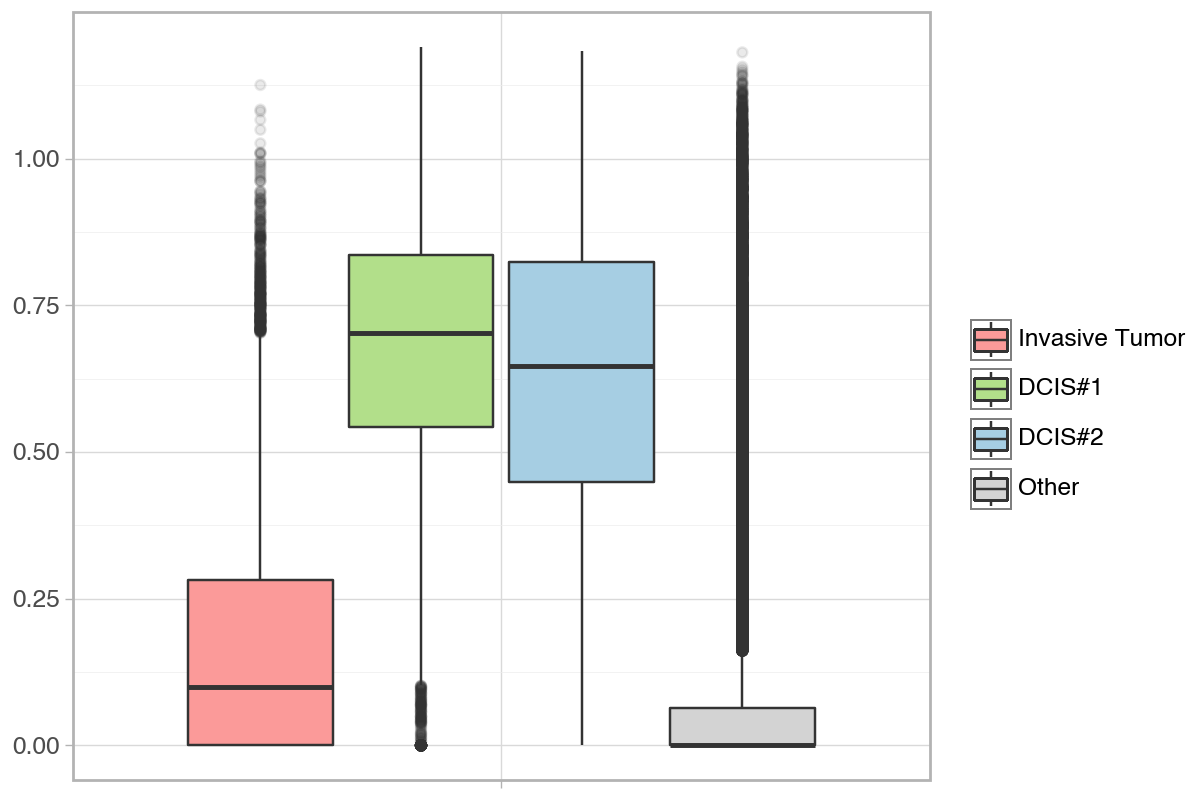

In [89]:
p = (
    ggplot(df_long, aes(x="Factor", y="Score", fill="Cells"))
    + geom_boxplot(outlier_alpha=0.1)
    # + labs(title=score_name)
    + scale_fill_manual(values=[DISCRETE_COLORS[2], DISCRETE_COLORS[1], DISCRETE_COLORS[0], "#d3d3d3"])
    + theme_light()
    + theme(figure_size=(6, 4), axis_title_x=element_blank(), axis_text_x=element_blank(), axis_title_y=element_blank())
    # + theme(figure_size=(20, 4), axis_text_x=element_text(rotation=0, hjust=1))
    + scale_x_discrete(
        limits=[celltype_factors[1]]
    )
    + labs(fill="")  # Remove legend title
)
p.show()

In [31]:
z_df = model.get_factors("anndata", ordered=True)[group_idx].to_df()
z_df.head()

Factor 2  Factor 1  Factor 3  Estrogen Response Early (H)  \
1      0.018047  0.000000  0.000000                     0.209231   
10     0.316939  0.291225  0.000000                     0.000000   
100    0.307919  0.173807  0.003715                     0.384835   
1000   0.378650  0.453076  0.000000                     0.450107   
10000  0.309249  0.224021  0.000000                     0.132138   

       Epithelial Mesenchymal Transition (H)  Androgen Response (H)  \
1                                    0.00000               0.667635   
10                                   0.00000               0.001931   
100                                  0.00000               0.769928   
1000                                 0.00000               0.749753   
10000                                0.80042               0.000000   

       Allograft Rejection (H)  Apoptosis (H)  Uv Response Up (H)  \
1                          0.0       0.000000            0.030095   
10                         0.0       0.000000            0.000000   
100                        0.0       0.000000            0.609385   
1000                       0.0       0.003474            0.490131   
10000                      0.0       0.699011            0.000000   

       Estrogen Response Late (H)  ...  Pi3K Akt Mtor Signaling (H)  \
1                        0.631355  ...                     0.000000   
10                       0.725691  ...                     0.000000   
100                      0.761538  ...                     0.000000   
1000                     0.052749  ...                     0.000000   
10000                    0.140385  ...                     0.074748   

       Interferon Alpha Response (H)  Myc Targets V1 (H)  Hypoxia (H)  \
1                           0.503176            0.000000     0.000000   
10                          0.197384            0.000000     0.507684   
100                         0.046092            0.000000     0.000000   
1000                        0.162887            0.456301     0.000000   
10000                       0.054273            0.445968     0.323927   

       Unfolded Protein Response (H)  E2F Targets (H)  \
1                                0.0         0.371806   
10                               0.0         0.065556   
100                              0.0         0.360207   
1000                             0.0         0.360403   
10000                            0.0         0.018158   

       Tnfa Signaling Via Nfkb (H)  Protein Secretion (H)  \
1                         0.000000               0.000000   
10                        0.913142               0.066051   
100                       0.000000               0.000000   
1000                      0.000000               0.103387   
10000                     0.000000               0.000000   

       Il2 Stat5 Signaling (H)  Adipogenesis (H)  
1                     0.000000          0.035862  
10                    0.233179          0.064917  
100                   0.051925          0.035607  
1000                  0.000000          0.008834  
10000                 0.000000          0.032950  

[5 rows x 36 columns]

In [32]:
cov_df = pd.DataFrame(
    model.covariates["group_xenium"],
    index=z_df.index,
)
cov_df.head()

0            1
1       847.259888   326.191376
10      838.764709   345.306793
100     844.083801    99.374840
1000    149.895996  1711.749023
10000  5273.015625  2532.042480

In [33]:
def scatterplot(data, hue, x=0, y=1, s=4, linewidth=0.0, rasterized=True, ax=None, **kwargs):
    return sns.scatterplot(
        data,
        x=x,
        y=y,
        hue=hue,
        s=s,
        ax=ax,
        linewidth=linewidth,
        alpha=1.0,
        rasterized=rasterized,
        **kwargs,
    )

In [79]:
def plot_scatter_grid(data, factor_cols, cat_cols, cat_order, cat_palette, ncols=4, **kwargs):
    nrows = (len(factor_cols) + len(cat_cols) + ncols - 1) // ncols
    fig, axs = plt.subplots(
        nrows,
        ncols,
        sharex=True,
        sharey=True,
        figsize=(ncols * 5 + len(cat_cols), nrows * 5),
        dpi=300,
        squeeze=False,
    )
    for i, rf in enumerate(factor_cols):
        ax = scatterplot(
            data, 
            rf, 
            ax=axs[i // ncols, i % ncols], 
            # palette=sns.color_palette("rocket_r", as_cmap=True),
            palette=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
            legend=False, 
            **kwargs
        )
        # ax.set_title(rf)
        ax.set(xlabel=None)
        ax.set(ylabel=None)

    i = len(factor_cols)
    for j, rc in enumerate(cat_cols):
        i += j
        ax = scatterplot(data, rc, ax=axs[i // ncols, i % ncols], hue_order=cat_order, palette=cat_palette, **kwargs)
        # ax.set_title(rc)
        ax.set(xlabel=None)
        ax.set(ylabel=None)

        
        # Customize the legend
        handles, labels = ax.get_legend_handles_labels()
        new_handles = [
            plt.Line2D(
                [0], [0], marker='o', color=h.get_edgecolor() if hasattr(h, 'get_edgecolor') else h.get_color(), markersize=4, linestyle='None'
            )
            for h in handles
        ]
    
        ax.legend(
            new_handles,
            labels,
            # title=rc,
            loc="center left",
            bbox_to_anchor=(1, 0.5),  # Position legend to the side
            frameon=False,
        )
    plt.xticks(ticks=[], labels=[])
    plt.yticks(ticks=[], labels=[])
    fig.tight_layout()
    plt.show()

In [80]:
# relevant_factors = model.factor_names.tolist()[:12]
# celltype_factors = [fn for fn in model.factor_names if "HALLMARK" not in fn]
# relevant_factors += celltype_factors

In [81]:
# relevant_factors = ["HALLMARK_ESTROGEN_RESPONSE_EARLY", "HALLMARK_ESTROGEN_RESPONSE_LATE", "Factor 3"]

In [82]:
# Prepare the data
celltype_df = factor_adata.obs[["celltype (high)"]].copy()
celltype_df["celltype (high)"] = celltype_df["celltype (high)"].astype(str)
celltype_df.loc[~celltype_df["celltype (high)"].isin(['DCIS#1', 'DCIS#2', 'Invasive Tumor']), "celltype (high)"] = "Other"
celltype_df = celltype_df.rename(columns={"celltype (high)": "Cells"})

plot_data = pd.concat([z_df, cov_df, celltype_df], axis=1)
        
# Define the desired order of categories and a custom palette
cat_order = ['Invasive Tumor', 'DCIS#1', 'DCIS#2', 'Other']
cat_palette = [DISCRETE_COLORS[2], DISCRETE_COLORS[1], DISCRETE_COLORS[0], "#d3d3d3"]

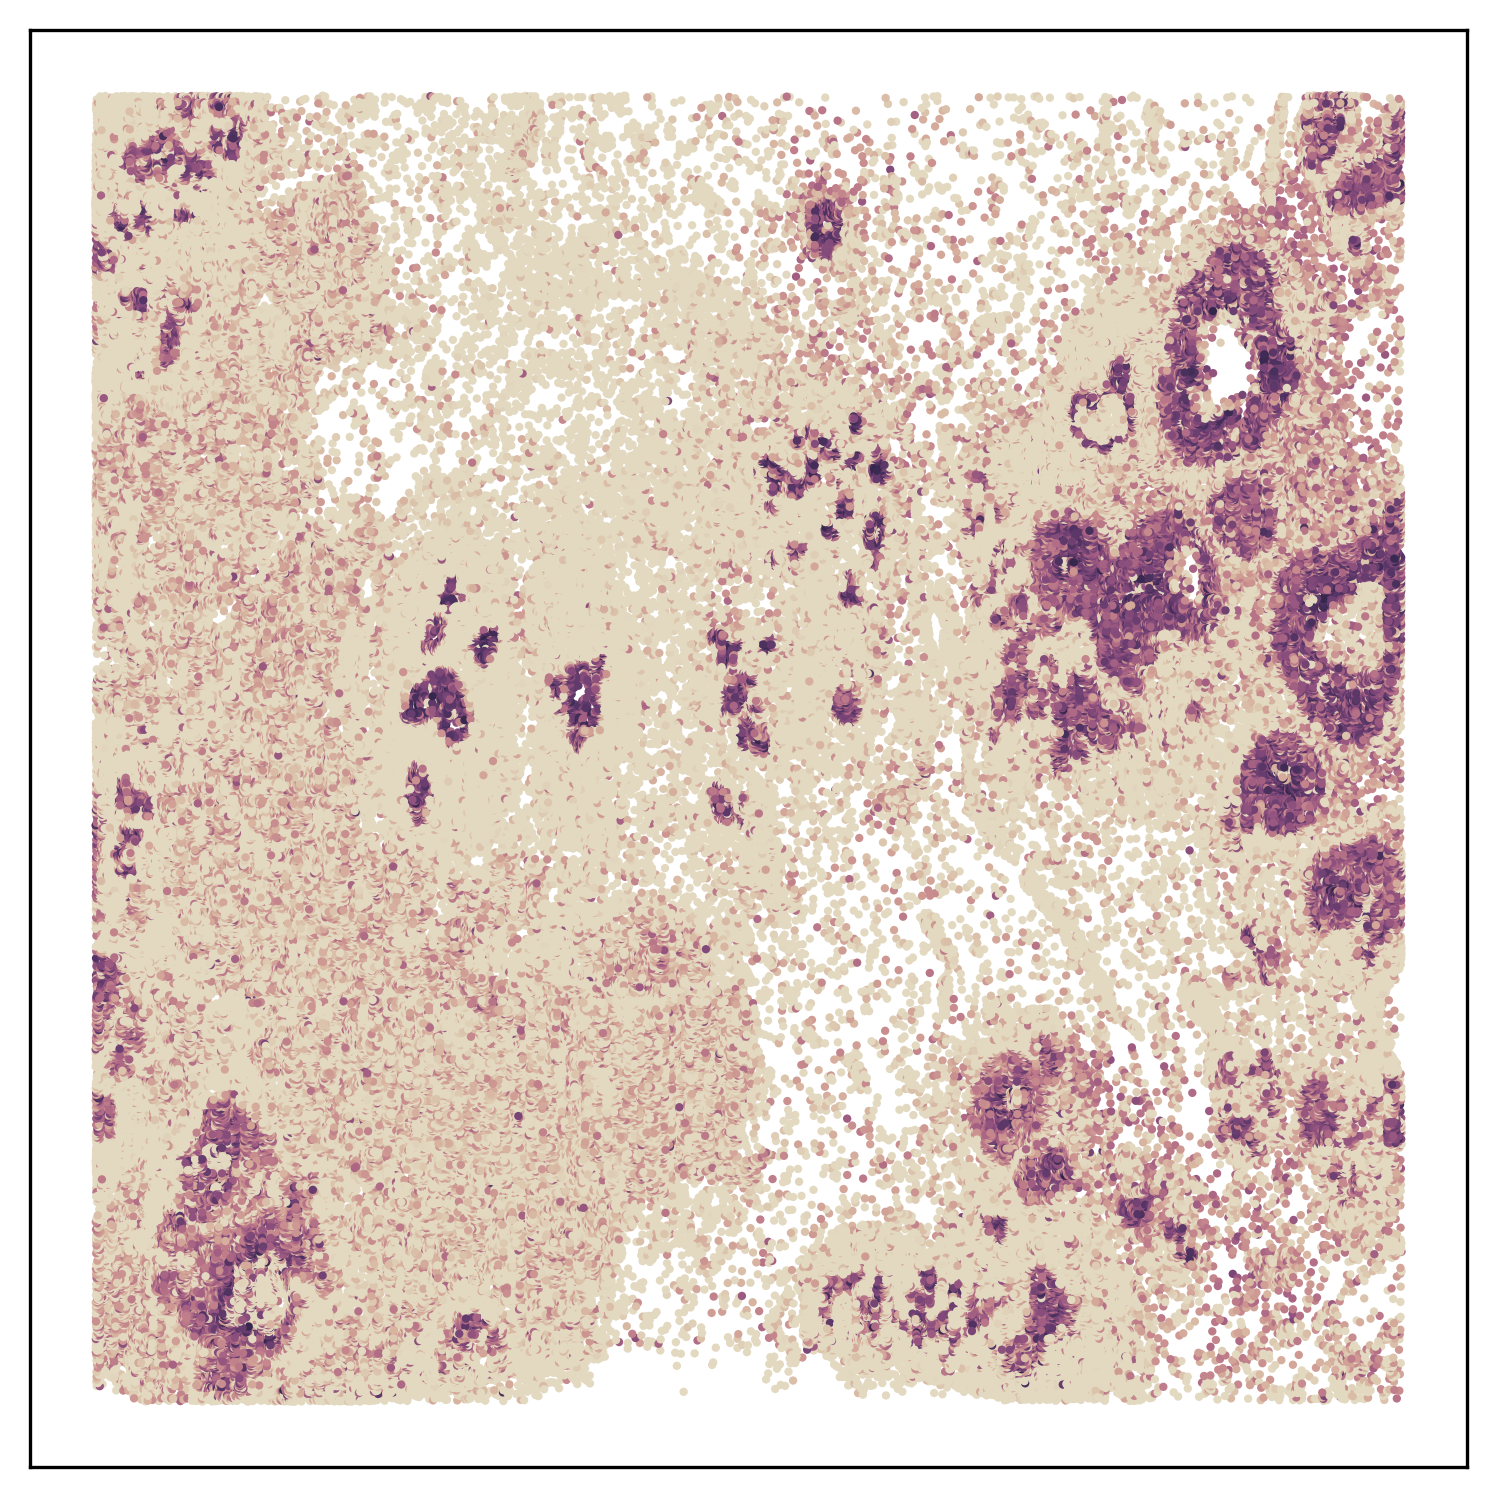

In [88]:
plot_scatter_grid(
    plot_data,
    [celltype_factors[1]],
    [],
    cat_order,
    cat_palette,
    ncols=1,
    # palette=sns.color_palette("rocket_r", as_cmap=True),
    # legend=False,
)

[Text(0.5, 0, ''), Text(0, 0.5, '')]

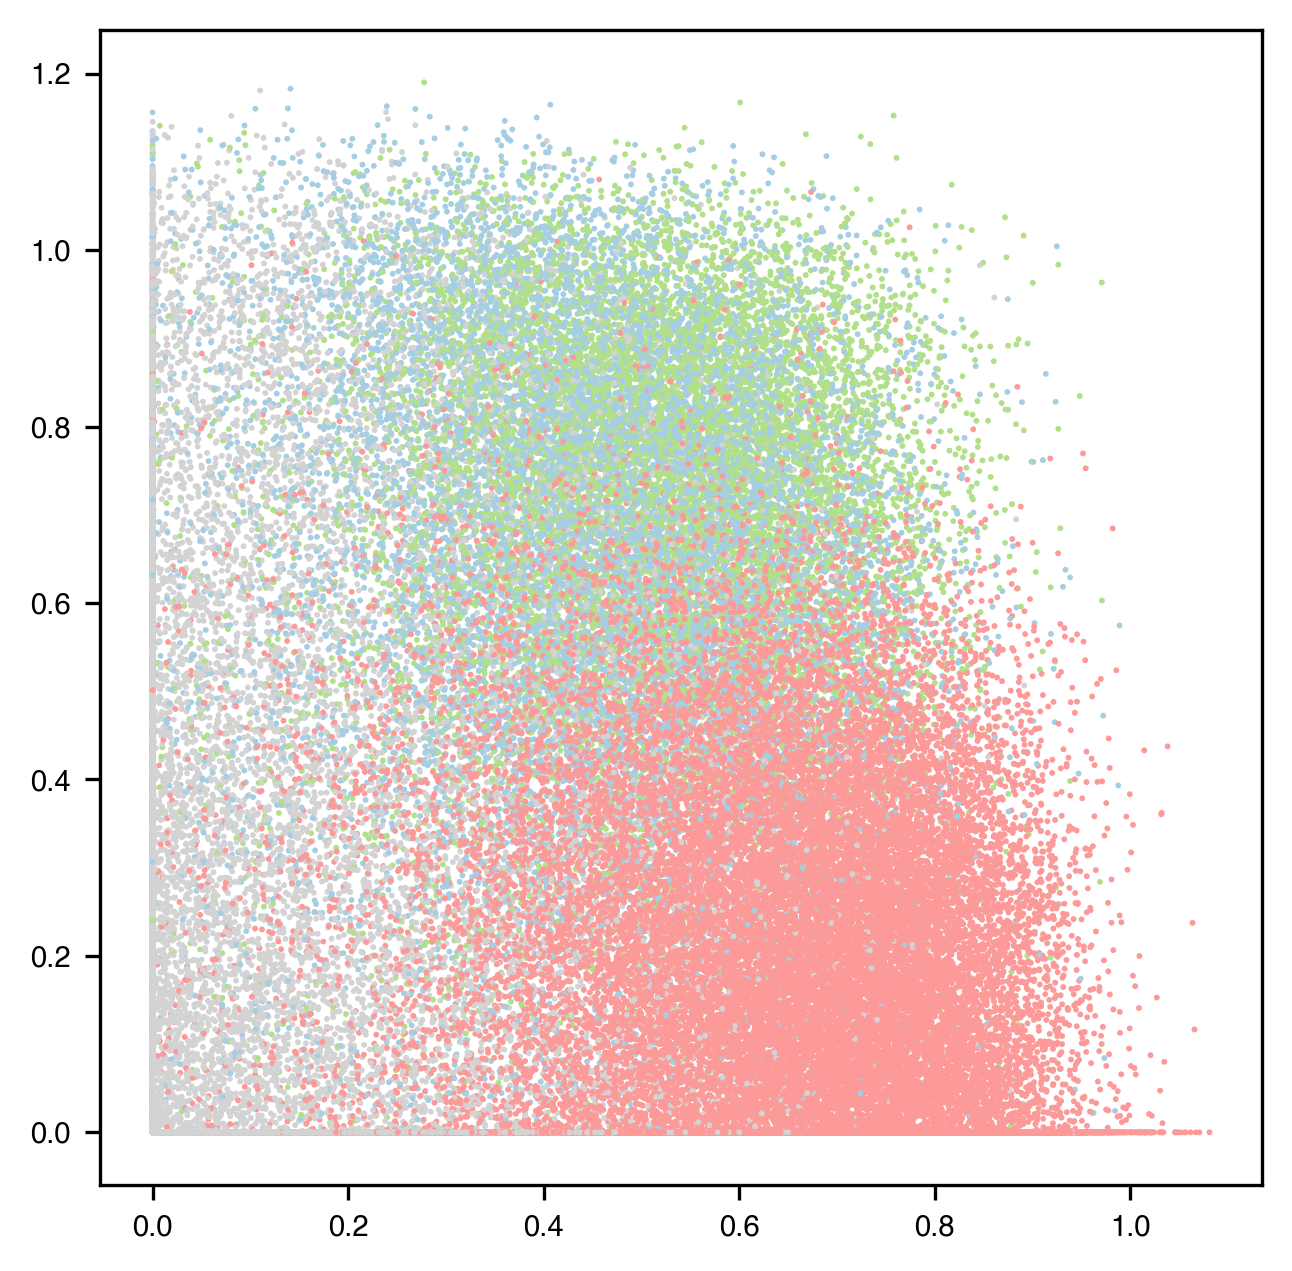

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=300)

ax = sns.scatterplot(plot_data, 
                x=celltype_factors[0], 
                y=celltype_factors[1], 
                hue="Cells", 
                s=2, 
                hue_order=cat_order, 
                palette=cat_palette, 
                linewidth=0.0, 
                alpha=1.0, 
                rasterized=True,
                legend=False
               )

ax.set(xlabel=None, ylabel=None)

In [40]:
# plot_scatter_grid(
#     pd.concat([z_df, cov_df], axis=1),
#     z_df.columns[3:11],
#     ncols=4,
# )

In [41]:
from plotting import plot_top_weights, rank, groupplot_rank, scatter

In [42]:
# scatter(
#     model,
#     "HALLMARK_ESTROGEN_RESPONSE_EARLY",
#     "HALLMARK_ESTROGEN_RESPONSE_LATE",
#     group_idx="group_xenium",
#     groupby="celltype (high)",
#     # groups=["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells"],
#     size=16,
# )

In [43]:
# sns.scatterplot(
#     pd.concat([z_df, factor_adata.obs["celltype (high)"]], axis=1),
#     x=celltype_factors[0],
#     y=celltype_factors[3],
#     hue="celltype (high)",
#     # groups=["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells"],
#     s=2,
# )
# plt.show()

In [44]:
# sns.scatterplot(
#     pd.concat([z_df, factor_adata.obs["celltype (high)"]], axis=1),
#     x=relevant_factors[0],
#     y=relevant_factors[2],
#     hue="celltype (high)",
#     # groups=["CD4+_T_Cells", "CD8+_T_Cells", "B_Cells"],
#     s=2,
# )
# plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
for ctf in celltype_factors:
    print(ctf, roc_auc_score(factor_adata.obs["celltype (high)"] == "Invasive Tumor", factor_adata.to_df().loc[:, ctf]))
    tumor_samples = factor_adata.obs["celltype (high)"].isin(["Invasive Tumor", "DCIS#1", "DCIS#2"])
    print(ctf, roc_auc_score(factor_adata.obs.loc[tumor_samples, "celltype (high)"] == "Invasive Tumor", factor_adata.to_df().loc[tumor_samples, ctf]))

Estrogen Response Early (H) 0.9313751406793922
Estrogen Response Early (H) 0.7342795560872983
Apical Junction (H) 0.549259520851675
Apical Junction (H) 0.07277710692039212


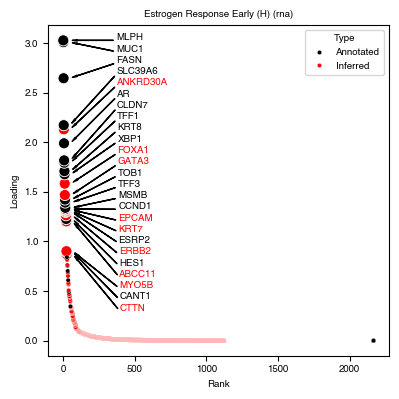

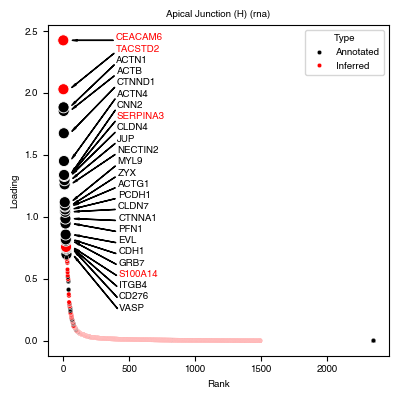

In [76]:
for rf in celltype_factors:
    plot_top_weights(model, rf, figsize=(4, 4), top=25)
    plt.show()

In [48]:
", ".join(model.get_weights()["rna"].loc[celltype_factors[1], :].sort_values(ascending=False).iloc[:20].index.tolist())

'CEACAM6, TACSTD2, ACTN1, ACTB, CTNND1, ACTN4, CNN2, SERPINA3, CLDN4, JUP, NECTIN2, MYL9, ZYX, ACTG1, PCDH1, CLDN7, CTNNA1, PFN1, EVL, CDH1'

In [49]:
# for rf in relevant_factors:
#     plotting.plot_top_weights_muvi(model, rf, figsize=(4, 6), top=15)
#     plt.show()

/home/aqoku/projects/code_new/prismo/src/prismo/pl/_plotting.py:690: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/home/aqoku/projects/code_new/prismo/src/prismo/pl/_plotting.py:730: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


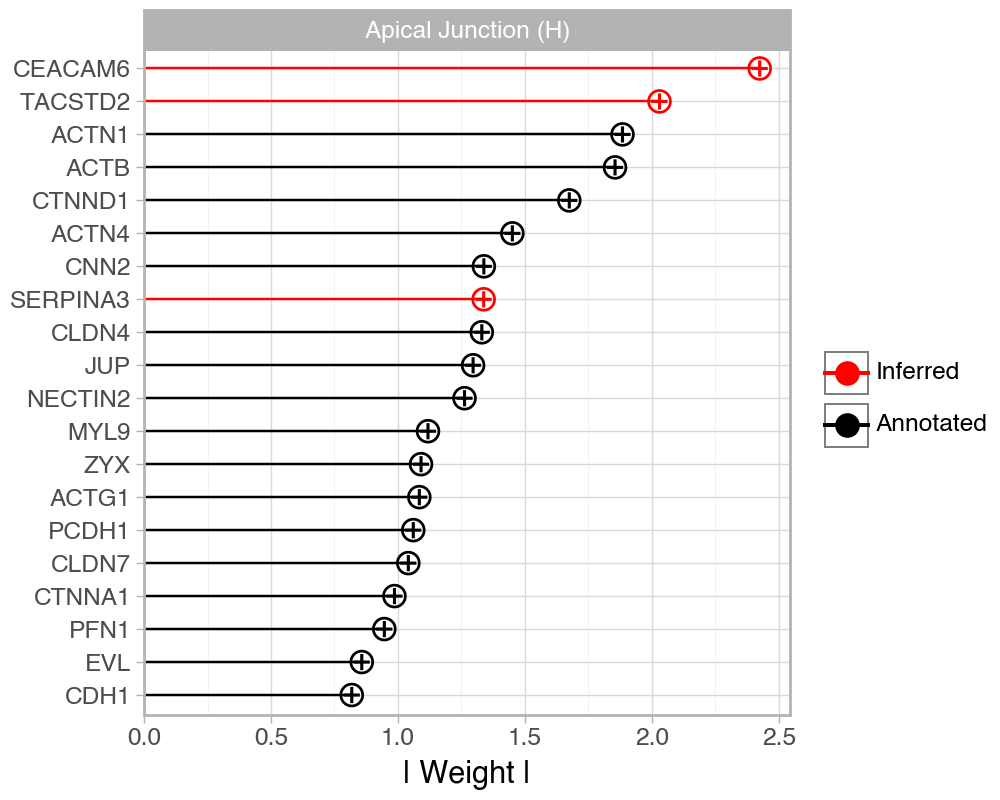

In [90]:
p = prismo.pl.plot_top_weights(model, n_features=20, views="rna", factors=celltype_factors[1])
p + theme_light() + theme(figure_size=(5, 4))
# plt.show()

In [51]:
asd

NameError: name 'asd' is not defined

In [ ]:
sc.pp.neighbors(factor_adata, n_neighbors=15, use_rep="X")
sc.tl.leiden(factor_adata, resolution=1, random_state=0, key_added='leiden')

In [ ]:
def plot_scatter_grid_leiden(data, relevant_cols, ncols=4, **kwargs):
    
    if isinstance(relevant_cols, str):
        relevant_cols = [relevant_cols]
        ncols = 1
        nrows = 1
        palette = None
    else:
        nrows = (len(relevant_cols) + ncols - 1) // ncols
        palette = sns.color_palette("rocket_r", as_cmap=True)
    
    fig, axs = plt.subplots(
        nrows,
        ncols,
        sharex=True,
        sharey=True,
        figsize=(ncols * 5, nrows * 5),
        squeeze=False,
    )
    for i, rf in enumerate(relevant_cols):
        ax = sns.scatterplot(
            data,
            x=0,
            y=1,
            hue=rf,
            s=4,
            # palette=sns.color_palette("rocket_r", as_cmap=True),
            ax=axs[i // ncols, i % ncols],
            linewidth=0.0,
            alpha=1.0,
            rasterized=True,
            legend=False,
            *kwargs,
        )
        # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_title(rf)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        # ax.set_xticks(ticks=[], labels=[])
        # ax.set_yticks(ticks=[], labels=[])

    plt.xticks(ticks=[], labels=[])
    plt.yticks(ticks=[], labels=[])
    fig.tight_layout()
    plt.show()

In [ ]:
leiden_top = 10
leiden_df = pd.concat([factor_adata.to_df(), cov_df, factor_adata.obs], axis=1)
leiden_df["leiden"].value_counts()

In [ ]:
leiden_df["leiden"] = leiden_df["leiden"].astype(str)
leiden_df.loc[~leiden_df["leiden"].isin(leiden_df["leiden"].value_counts().iloc[:leiden_top].index), "leiden"] = "Other"
leiden_df["leiden"] = leiden_df["leiden"].astype("category")

In [ ]:
plot_scatter_grid_leiden(leiden_df, "leiden")

In [ ]:
plot_scatter_grid_leiden(leiden_df, "celltype (high)")

In [ ]:
sum(model.n_samples.values()) // 10000

In [ ]:
10000 / 20